In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torchvision import transforms
from model_functions import *
from scf import *
from data_loader_scf import *
from model_types import efficientnet_1, custom_model1
from torchsummary import summary
from torchvision import models

from copy import deepcopy

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
efnet_model = efficientnet_1.Model(in_channels=4)

In [4]:
train_dir = '../../Data/Dataset_new/scf/Train/'
val_dir = '../../Data/Dataset_new/scf/Validation/'

train_data = data_loader(train_dir, shuffle=True, batch_size=64, binary=True)
val_data = data_loader(val_dir, shuffle=False, batch_size=64, binary=True)

In [5]:
# summary(deepcopy(efnet_model).to(device), (4,512,512))

In [6]:
criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([0.372]).to(device))
optimizer = optim.Adam(efnet_model.parameters(), lr=0.0001, weight_decay=0.00001)

In [7]:
epochs = 10
loss, optimizer = train_model_binary(efnet_model, epochs, criterion, optimizer, train_data, device)

Epoch 1/10, Loss: 12.27833753824234, Training accuracy: 0.42257597684515197
Epoch 2/10, Loss: 11.898663491010666, Training accuracy: 0.573082489146165
Epoch 3/10, Loss: 11.537203699350357, Training accuracy: 0.627592860588519
Epoch 4/10, Loss: 11.215995848178864, Training accuracy: 0.6497829232995659
Epoch 5/10, Loss: 10.845263302326202, Training accuracy: 0.6676314520019295
Epoch 6/10, Loss: 10.580214709043503, Training accuracy: 0.6801736613603473
Epoch 7/10, Loss: 10.339195251464844, Training accuracy: 0.6888567293777135
Epoch 8/10, Loss: 10.193736791610718, Training accuracy: 0.6922334780511337
Epoch 9/10, Loss: 10.337401986122131, Training accuracy: 0.683068017366136
Epoch 10/10, Loss: 10.084788411855698, Training accuracy: 0.6951278340569224
Training for 10 epochs is done


In [8]:
accuracy = evaluate_model_binary(efnet_model, val_data, device)

Validation accuracy: 65.32%


In [9]:
save_path = r'C:\AAA\FYP\mimo-radar-drone-detection-fyp\final code\saved_models_type\efficientnet_spatial'
save_model(save_path, efnet_model, f'efficientnet_model_10_epoch_{round(accuracy)}', optimizer=optimizer)

<Axes: >

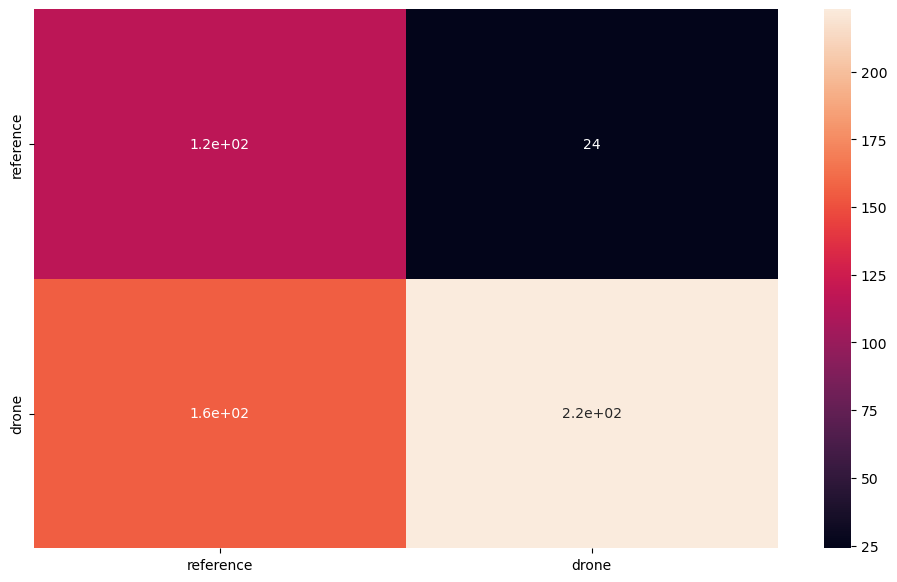

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np

y_pred = []
y_true = []

efnet_model = efnet_model.to(device)
efnet_model.eval()

with torch.no_grad():
    for inputs, labels in val_data:
        inputs = inputs.to(dtype=torch.float)
        inputs, labels = inputs.to(device), labels.to(device).reshape(-1,1)
        output = efnet_model(inputs)
        predicted = (output > 0).float().reshape(-1).data.cpu().numpy()
        y_pred.extend(predicted)
        
        labels = labels.reshape(-1).data.cpu().numpy()
        y_true.extend(labels)

classes = ('reference', 'drone')

cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)

Epoch 1/10, Loss: 10.027407482266426, Training accuracy: 0.6864447660395562
Epoch 2/10, Loss: 9.995379477739334, Training accuracy: 0.6907863000482393
Epoch 3/10, Loss: 9.707499131560326, Training accuracy: 0.7071876507477086
Epoch 4/10, Loss: 9.740128263831139, Training accuracy: 0.7206946454413893
Epoch 5/10, Loss: 9.72091656923294, Training accuracy: 0.6869271587071877
Epoch 6/10, Loss: 9.480035349726677, Training accuracy: 0.7100820067534973
Epoch 7/10, Loss: 9.372216671705246, Training accuracy: 0.7105643994211288
Epoch 8/10, Loss: 9.559135973453522, Training accuracy: 0.7120115774240231
Epoch 9/10, Loss: 9.503322064876556, Training accuracy: 0.7240713941148095
Epoch 10/10, Loss: 9.440679982304573, Training accuracy: 0.7163531114327062
Training for 10 epochs is done
Validation accuracy: 66.47%


<Axes: >

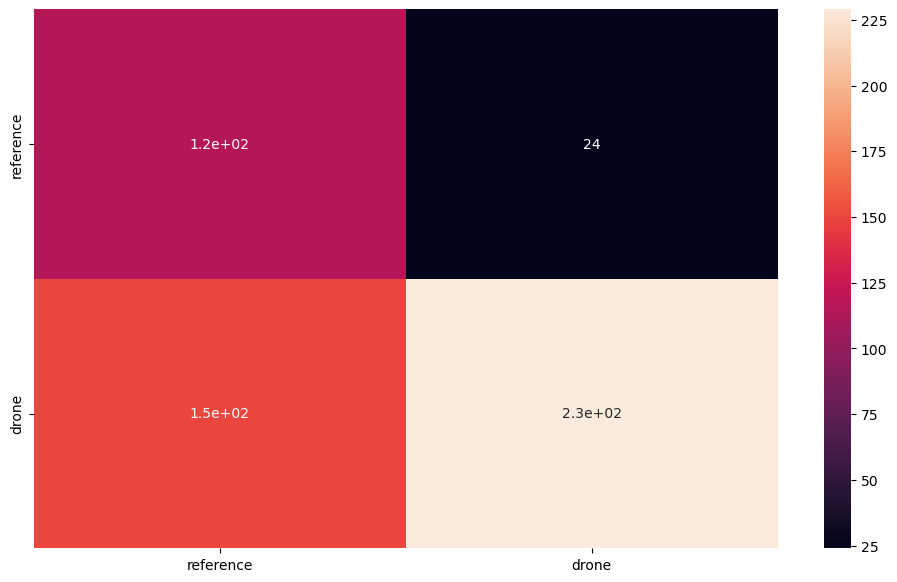

In [11]:
epochs = 10
loss, optimizer = train_model_binary(efnet_model, epochs, criterion, optimizer, train_data, device)

accuracy = evaluate_model_binary(efnet_model, val_data, device)

save_path = r'C:\AAA\FYP\mimo-radar-drone-detection-fyp\final code\saved_models_type\efficientnet_spatial'
save_model(save_path, efnet_model, f'efficientnet_model_20_epoch_{round(accuracy)}', optimizer=optimizer)

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np

y_pred = []
y_true = []

efnet_model = efnet_model.to(device)
efnet_model.eval()

with torch.no_grad():
    for inputs, labels in val_data:
        inputs = inputs.to(dtype=torch.float)
        inputs, labels = inputs.to(device), labels.to(device).reshape(-1,1)
        output = efnet_model(inputs)
        predicted = (output > 0).float().reshape(-1).data.cpu().numpy()
        y_pred.extend(predicted)
        
        labels = labels.reshape(-1).data.cpu().numpy()
        y_true.extend(labels)

classes = ('reference', 'drone')

cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)

In [12]:
epochs = 10
loss, optimizer = train_model_binary(efnet_model, epochs, criterion, optimizer, train_data, device)

accuracy = evaluate_model_binary(efnet_model, val_data, device)

save_path = r'C:\AAA\FYP\mimo-radar-drone-detection-fyp\final code\saved_models_type\efficientnet_spatial'
save_model(save_path, efnet_model, f'efficientnet_model_30_epoch_{round(accuracy)}', optimizer=optimizer)

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np

y_pred = []
y_true = []

efnet_model = efnet_model.to(device)
efnet_model.eval()

with torch.no_grad():
    for inputs, labels in val_data:
        inputs = inputs.to(dtype=torch.float)
        inputs, labels = inputs.to(device), labels.to(device).reshape(-1,1)
        output = efnet_model(inputs)
        predicted = (output > 0).float().reshape(-1).data.cpu().numpy()
        y_pred.extend(predicted)
        
        labels = labels.reshape(-1).data.cpu().numpy()
        y_true.extend(labels)

classes = ('reference', 'drone')

cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)

Epoch 1/10, Loss: 9.364360004663467, Training accuracy: 0.7178002894356006
Epoch 2/10, Loss: 9.476741462945938, Training accuracy: 0.7158707187650748
Epoch 3/10, Loss: 9.379698723554611, Training accuracy: 0.7095996140858659
Epoch 4/10, Loss: 9.288788840174675, Training accuracy: 0.7250361794500724
Epoch 5/10, Loss: 9.17225095629692, Training accuracy: 0.7081524360829715


KeyboardInterrupt: 

In [ ]:
epochs = 10
loss, optimizer = train_model_binary(efnet_model, epochs, criterion, optimizer, train_data, device)

accuracy = evaluate_model_binary(efnet_model, val_data, device)

save_path = r'C:\AAA\FYP\mimo-radar-drone-detection-fyp\final code\saved_models_type\efficientnet_spatial'
save_model(save_path, efnet_model, f'efficientnet_model_40_epoch_{round(accuracy)}', optimizer=optimizer)

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np

y_pred = []
y_true = []

efnet_model = efnet_model.to(device)
efnet_model.eval()

with torch.no_grad():
    for inputs, labels in val_data:
        inputs = inputs.to(dtype=torch.float)
        inputs, labels = inputs.to(device), labels.to(device).reshape(-1,1)
        output = efnet_model(inputs)
        predicted = (output > 0).float().reshape(-1).data.cpu().numpy()
        y_pred.extend(predicted)
        
        labels = labels.reshape(-1).data.cpu().numpy()
        y_true.extend(labels)

classes = ('reference', 'drone')

cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)

In [ ]:
epochs = 10
loss, optimizer = train_model_binary(efnet_model, epochs, criterion, optimizer, train_data, device)

accuracy = evaluate_model_binary(efnet_model, val_data, device)

save_path = r'C:\AAA\FYP\mimo-radar-drone-detection-fyp\final code\saved_models_type\efficientnet_spatial'
save_model(save_path, efnet_model, f'efficientnet_model_50_epoch_{round(accuracy)}', optimizer=optimizer)

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np

y_pred = []
y_true = []

efnet_model = efnet_model.to(device)
efnet_model.eval()

with torch.no_grad():
    for inputs, labels in val_data:
        inputs = inputs.to(dtype=torch.float)
        inputs, labels = inputs.to(device), labels.to(device).reshape(-1,1)
        output = efnet_model(inputs)
        predicted = (output > 0).float().reshape(-1).data.cpu().numpy()
        y_pred.extend(predicted)
        
        labels = labels.reshape(-1).data.cpu().numpy()
        y_true.extend(labels)

classes = ('reference', 'drone')

cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)

In [ ]:
epochs = 10
loss, optimizer = train_model_binary(efnet_model, epochs, criterion, optimizer, train_data, device)

accuracy = evaluate_model_binary(efnet_model, val_data, device)

save_path = r'C:\AAA\FYP\mimo-radar-drone-detection-fyp\final code\saved_models_type\efficientnet_spatial'
save_model(save_path, efnet_model, f'efficientnet_model_60_epoch_{round(accuracy)}', optimizer=optimizer)

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np

y_pred = []
y_true = []

efnet_model = efnet_model.to(device)
efnet_model.eval()

with torch.no_grad():
    for inputs, labels in val_data:
        inputs = inputs.to(dtype=torch.float)
        inputs, labels = inputs.to(device), labels.to(device).reshape(-1,1)
        output = efnet_model(inputs)
        predicted = (output > 0).float().reshape(-1).data.cpu().numpy()
        y_pred.extend(predicted)
        
        labels = labels.reshape(-1).data.cpu().numpy()
        y_true.extend(labels)

classes = ('reference', 'drone')

cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)

In [ ]:
epochs = 10
loss, optimizer = train_model_binary(efnet_model, epochs, criterion, optimizer, train_data, device)

accuracy = evaluate_model_binary(efnet_model, val_data, device)

save_path = r'C:\AAA\FYP\mimo-radar-drone-detection-fyp\final code\saved_models_type\efficientnet_spatial'
save_model(save_path, efnet_model, f'efficientnet_model_70_epoch_{round(accuracy)}', optimizer=optimizer)

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np

y_pred = []
y_true = []

efnet_model = efnet_model.to(device)
efnet_model.eval()

with torch.no_grad():
    for inputs, labels in val_data:
        inputs = inputs.to(dtype=torch.float)
        inputs, labels = inputs.to(device), labels.to(device).reshape(-1,1)
        output = efnet_model(inputs)
        predicted = (output > 0).float().reshape(-1).data.cpu().numpy()
        y_pred.extend(predicted)
        
        labels = labels.reshape(-1).data.cpu().numpy()
        y_true.extend(labels)

classes = ('reference', 'drone')

cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)